In the paper "Using deep sequencing to characterize the biophysical mechanism of a transcriptional regulatory sequence" by Kinney et. al., the authors look at nucleotide positions that affect expression in order to locate functional binding sites within a promoter. They use an information footprint to determine which binding site is involved in response to specific biochemical signals. 

The information footprint is created using mutual information. Here, I attempt to replicate the information footprint using the data from Kinney et. al.'s full-wt experiment. The data is a set of 75 base-pair-long (bp) sequences and a batch number indicating the fluorescence level of the bacteria with that sequence. For each nucleotide position, the number of sequences in each batch μ having each of the four possible bases b_i (A, C, T, or G). The mutual information between these two variables for each position create the information footprint. 

Text(0, 0.5, 'Information (bits)')

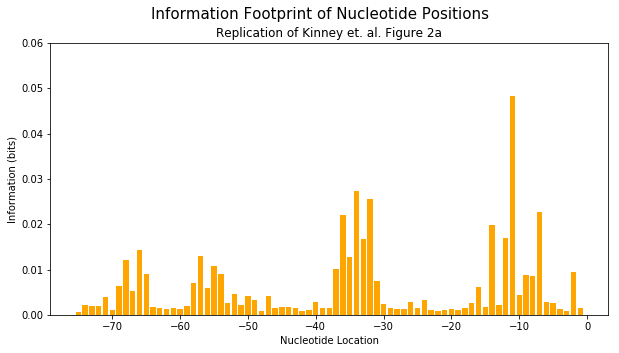

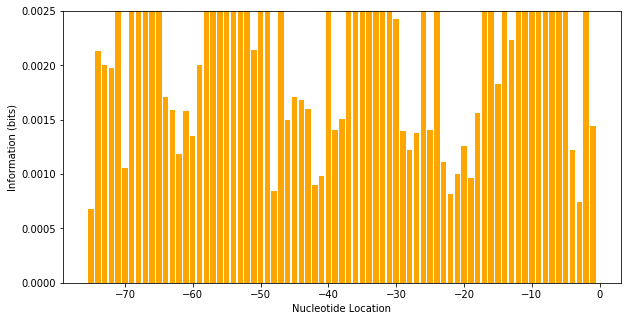

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load file and extract data from full-wt experiment
file = np.loadtxt('file_S2.txt', dtype = str) 
data_fullwt = file[np.where(file[:,0] == "full-wt")]
num_data = np.shape(data_fullwt)[0]

batches = data_fullwt[:, 1]
basepairs = data_fullwt[:, 2]

N = 75
b = 4
mu = 10

# separate A, C, T, G in strings for each trial
bp = np.zeros(((num_data),N),dtype=str)
for ii in range(num_data):
    for jj, pair in enumerate(basepairs[ii]):
        bp[ii,jj] = pair

# batch names
batch_names = np.unique(batches, return_counts = True)[0]

# separate data by batch
B = [] 

for ii in range(len(batch_names)):
    batch_num = bp[np.where(data_fullwt[:, 1] == batch_names[ii])]
    B.append(batch_num)

# Calculate mutual info
mu_b = np.zeros((mu, b))
f_mu = np.zeros(mu)
f_b = np.zeros(b)
I_naive = 0
I_all = np.zeros(N)
for ii in range(N):
    
    # f(b, mu)
    for jj in range(mu):
        vals, freq = np.unique(B[jj][:, ii], return_counts = 'true')
        mu_b[jj, :] = freq
    mu_b = mu_b/sum(sum(mu_b))
    
    # f(mu)
    for kk in range(mu):
        f_mu[kk] = sum(mu_b[kk, :])
    
    # f(b)
    for ll in range(b):
        f_b[ll] = sum(mu_b[:, ll])
    
    # info
    for mm in range(mu):
        for nn in range(b):
            I_all[ii] = I_all[ii] + mu_b[mm, nn]*np.log2(mu_b[mm, nn]/(f_mu[mm]*f_b[nn]))


adjustment = (3*9*np.log2(np.exp(1)))/(2*num_data)
I_all = I_all + adjustment

# recreate figure
nuc = np.arange(N) - 75
plt.figure(1, figsize = (10, 5))
plt.bar(nuc, I_all, color = 'orange')
plt.ylim((0, 0.06))
plt.xlabel('Nucleotide Location')
plt.ylabel('Information (bits)')
plt.suptitle('Information Footprint of Nucleotide Positions', fontsize = 15)
plt.title('Replication of Kinney et. al. Figure 2a')

plt.figure(2, figsize = (10, 5))
plt.bar(nuc, I_all, color = 'orange')
plt.ylim((0, 0.0025))
plt.xlabel('Nucleotide Location')
plt.ylabel('Information (bits)')
 